In [25]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import cv2
import re
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Input, Flatten, Dense, GlobalMaxPooling2D,BatchNormalization

In [26]:
dirs = os.scandir(r'C:\Users\91891\Downloads\archive (13)\CUB_200_2011\CUB_200_2011\images')

In [27]:
labels = []
for i in dirs:
    if i.is_dir():
        labels.append(i.name[4:])

In [28]:
labels_dict = {}
count = 0
for i in range(len(labels)):
    labels_dict[labels[i]] = count
    count = count + 1

In [29]:
image_dir = os.scandir(r'C:\Users\91891\Downloads\archive (13)\CUB_200_2011\CUB_200_2011\images')
folders = []
for i in image_dir:
    folders.append(i.name)

In [30]:
img_dirs = []
for entry in os.scandir(r'C:\Users\91891\Downloads\archive (13)\CUB_200_2011\CUB_200_2011\images'):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [31]:
file_path_images = []
for img in img_dirs:
    for entry in os.scandir(img):
        file_path_images.append(entry.path)

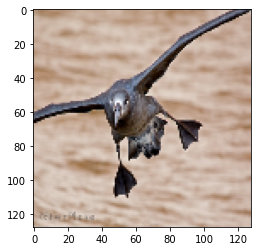

In [32]:
images = cv2.imread(file_path_images[3])
images = cv2.resize(images, (128,128))
plt.imshow(images)

In [33]:
X = []
Y = []
for image in range(len(file_path_images)):
    img = cv2.imread(file_path_images[image])
    img1 = cv2.resize(img, (224,224))
    X.append(img1)
    half_text = file_path_images[image].split('\\')[-1][:-4]
    pattern = r'^([A-Za-z_]+)'
    match = re.match(pattern,half_text)
    if match:
        result = match.group(1).rstrip('_')
    Y.append(labels_dict[result])

In [34]:
X = np.array(X)
Y = np.array(Y)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20)
X_train = X_train.astype('float32')
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

num_classes = 200

#data_augmentation = keras.Sequential([
#    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
 #                                                        input_shape=(64,64,3)),
  #  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
   # tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
#])
shape = X_train[0].shape

model = keras.Sequential([
    #data_augmentation,
    Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = shape) ,
    Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'),
    #BatchNormalization(),
    MaxPooling2D(pool_size = [3,3]),
    
    Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'),
    Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'),
    #BatchNormalization(),
    MaxPooling2D(pool_size = [3,3]),
    
    Conv2D(512, kernel_size = [3,3], padding = 'same', activation = 'relu'),
    Conv2D(512, kernel_size = [3,3], padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = [3,3]),
    BatchNormalization(),
    
    Flatten(),
    Dropout(0.5),
    Dense(512,activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    Dense(200, activation='softmax')
           ])

In [11]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

#es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                    

In [13]:
model.fit(X_train_scaled, Y_train,epochs=25,batch_size=128,validation_split=0.125)

Epoch 1/25
65/65 [==============================] - 236s 4s/step - loss: 5.7350 - accuracy: 0.0120 - val_loss: 5.6917 - val_accuracy: 0.0068
Epoch 2/25
65/65 [==============================] - 227s 3s/step - loss: 5.0797 - accuracy: 0.0271 - val_loss: 5.4813 - val_accuracy: 0.0144
Epoch 3/25
65/65 [==============================] - 228s 4s/step - loss: 4.6286 - accuracy: 0.0623 - val_loss: 5.4245 - val_accuracy: 0.0161
Epoch 4/25
65/65 [==============================] - 234s 4s/step - loss: 4.2420 - accuracy: 0.1027 - val_loss: 5.1696 - val_accuracy: 0.0382
Epoch 5/25
65/65 [==============================] - 229s 4s/step - loss: 3.8826 - accuracy: 0.1538 - val_loss: 4.8511 - val_accuracy: 0.0797
Epoch 6/25
65/65 [==============================] - 228s 4s/step - loss: 3.5993 - accuracy: 0.1992 - val_loss: 4.5598 - val_accuracy: 0.0950
Epoch 7/25
65/65 [==============================] - 228s 4s/step - loss: 3.2747 - accuracy: 0.2572 - val_loss: 4.2754 - val_accuracy: 0.1332
Epoch 8/25
65

In [14]:
model.evaluate(X_test_scaled,Y_test)

74/74 [==============================] - 12s 168ms/step - loss: 5.0832 - accuracy: 0.2388


[5.083240985870361, 0.23876166343688965]

In [16]:
batch_size = 64
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train_scaled,Y_train,batch_size)
#steps_per_epoch = X_train.shape[0]
r = model.fit_generator(train_generator, validation_data=(X_test_scaled,Y_test),epochs=30)

C:\Users\91891\AppData\Local\Temp/ipykernel_21272/1842941585.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(X_test_scaled,Y_test),epochs=30)


Epoch 1/30
148/148 [==============================] - 408s 3s/step - loss: 3.7493 - accuracy: 0.2393 - val_loss: 4.2846 - val_accuracy: 0.2074
Epoch 2/30
148/148 [==============================] - 533s 4s/step - loss: 3.4608 - accuracy: 0.2892 - val_loss: 5.2281 - val_accuracy: 0.1506
Epoch 3/30
148/148 [==============================] - 657s 4s/step - loss: 3.3088 - accuracy: 0.3139 - val_loss: 4.2906 - val_accuracy: 0.2286
Epoch 4/30
148/148 [==============================] - 652s 4s/step - loss: 3.1871 - accuracy: 0.3363 - val_loss: 4.5472 - val_accuracy: 0.2209
Epoch 5/30
148/148 [==============================] - 1923s 13s/step - loss: 3.0678 - accuracy: 0.3473 - val_loss: 3.9897 - val_accuracy: 0.2634
Epoch 6/30
148/148 [==============================] - 644s 4s/step - loss: 2.9518 - accuracy: 0.3703 - val_loss: 4.0602 - val_accuracy: 0.2489
Epoch 7/30
148/148 [==============================] - 499s 3s/step - loss: 2.8917 - accuracy: 0.3857 - val_loss: 4.0143 - val_accuracy: 0.26

In [17]:
model.evaluate(X_test_scaled,Y_test)

74/74 [==============================] - 29s 382ms/step - loss: 4.0474 - accuracy: 0.3338


[4.047434329986572, 0.3337574303150177]

In [22]:
import tensorflow_hub as hub
feature_extractor_model3 = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2"
pretrained_model3 = hub.KerasLayer(
feature_extractor_model3, input_shape=(224,224,3), trainable=False)

In [35]:
num_of_birds = 200

model3 = tf.keras.Sequential([
    pretrained_model3,
    Dense(num_of_birds,activation='softmax')
])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              5919312   
                                                                 
 dense_5 (Dense)             (None, 200)               256200    
                                                                 
Total params: 6,175,512
Trainable params: 256,200
Non-trainable params: 5,919,312
_________________________________________________________________


In [36]:
model3.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])
model3.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5


C:\Users\91891\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


295/295 [==============================] - 544s 2s/step - loss: 2.6944 - acc: 0.3990
Epoch 2/5
295/295 [==============================] - 511s 2s/step - loss: 1.0137 - acc: 0.7522
Epoch 3/5
295/295 [==============================] - 508s 2s/step - loss: 0.6376 - acc: 0.8572
Epoch 4/5
295/295 [==============================] - 513s 2s/step - loss: 0.4369 - acc: 0.9138
Epoch 5/5
295/295 [==============================] - 515s 2s/step - loss: 0.3118 - acc: 0.9507


In [37]:
model3.evaluate(X_test_scaled,Y_test)

74/74 [==============================] - 130s 2s/step - loss: 1.1594 - acc: 0.6773


[1.1593600511550903, 0.6772688627243042]

In [39]:
batch_size = 64
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train_scaled,Y_train,batch_size)
#steps_per_epoch = X_train.shape[0]
r = model3.fit_generator(train_generator, validation_data=(X_test_scaled,Y_test),epochs=5)

C:\Users\91891\AppData\Local\Temp/ipykernel_21272/262859986.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model3.fit_generator(train_generator, validation_data=(X_test_scaled,Y_test),epochs=5)


Epoch 1/5
148/148 [==============================] - 646s 4s/step - loss: 0.4805 - acc: 0.8840 - val_loss: 1.1922 - val_acc: 0.6743
Epoch 2/5
148/148 [==============================] - 774s 5s/step - loss: 0.3902 - acc: 0.9094 - val_loss: 1.1797 - val_acc: 0.6735
Epoch 3/5
148/148 [==============================] - 398s 3s/step - loss: 0.3411 - acc: 0.9303 - val_loss: 1.1833 - val_acc: 0.6705
Epoch 4/5
148/148 [==============================] - 373s 3s/step - loss: 0.3068 - acc: 0.9391 - val_loss: 1.1654 - val_acc: 0.6760
Epoch 5/5
148/148 [==============================] - 393s 3s/step - loss: 0.2700 - acc: 0.9501 - val_loss: 1.1592 - val_acc: 0.6781


In [103]:
Y_pred = model3.predict(X_test_scaled)

74/74 [==============================] - 43s 561ms/step


In [107]:
np.argmax(Y_pred[0])

120

In [105]:
model3.evaluate(X_test_scaled,Y_test)

74/74 [==============================] - 44s 565ms/step - loss: 1.1592 - acc: 0.6781


[1.1591945886611938, 0.678117036819458]

In [108]:
Y_test[0:10]

array([120, 143,  63,  25,  17, 185, 145, 105, 163, 129])

In [109]:
for i in range(10):
    print(np.argmax(Y_pred[i]))

120
140
63
8
17
185
145
105
163
153


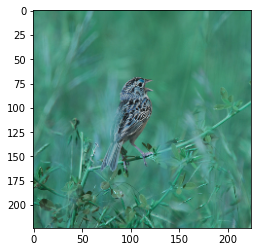

In [113]:
plt.imshow(X_test[0])